# Macroeconomics and Inequality in Uganda

## Preliminaries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_functions_albert import gini
import seaborn as sns
df1=pd.read_excel("datafiles/UNPS_1112_PS2.xls")
df2=pd.read_excel("datafiles/variables_description_UNPS_1112_PS2.xlsx")

# Exercise 1
Exercise 1. Exploring the data (25 points).

a. Are there duplicate households in the data? That is check if there are repeated observations
in the unique household identifier variable (’hhid’). How many observations are there in
the data?

b. Present some basic summary statistics for the following variables: head_gender, head _age,
familysize, consumption, income, wealth. Comment your results in 2 lines. In particular, you
might mention if there are missing observations or potential outliers for some of the variables.

c. Using the head_gender variable, create a dummy variable for household head being female
(1=female, 0=male). Be careful with missing values. What is the proportion of households
where the head is female?

d. Using the groupby method, compute the average consumption, average household size,
and average household head age for households where the head is male vs where the head
is female. Do we observe noticeable differences across the two groups?

In [11]:
#Part A
if df1.duplicated(subset='hhid').any():
    print('There are duplicates in the unique household identifier variable.')
else:
    print('There are no duplicates in the unique household identifier variable.')
#Part B

variables=['head_gender','head_age','familysize','consumption','income','wealth']
print(df1[variables].describe())


for column in variables:
    print(column,'has',df1[column].isna().sum(),'missing variables')
#Part C
df1['female'] = 1*(df1['head_gender']==2)
proportion=(df1['female']).mean()
print(f'The proportion of head_female to head_gender is {proportion:.2f}.')
#Part D
headtest = df1[['familysize','head_age','consumption', 'female']].dropna().groupby('female').mean()
print(headtest)


There are no duplicates in the unique household identifier variable.
       head_gender     head_age   familysize  consumption        income  \
count  2597.000000  2597.000000  2597.000000  2613.000000   2613.000000   
mean      1.314209    46.068156     7.480554  1803.792687   1860.075795   
std       0.464289    15.068960     3.712526  1308.742941   2607.517603   
min       1.000000    14.000000     1.000000   250.305506     27.486921   
25%       1.000000    34.000000     5.000000   918.324958    471.204368   
50%       1.000000    44.000000     7.000000  1426.614855   1061.194208   
75%       2.000000    56.000000     9.000000  2296.859516   2234.800590   
max       2.000000   100.000000    33.000000  8369.898484  52137.736864   

             wealth  
count   2613.000000  
mean    4912.698146  
std     8359.886497  
min        0.000000  
25%      720.019916  
50%     2108.598380  
75%     5221.939857  
max    76396.339917  
head_gender has 16 missing variables
head_age has 16 miss

Part A: There are 2613 observations in the dataset.

Part B Comment:
The minimum total household income is considerably low compared to the mean income. There is some missing data for head_gender, head_age, and familysize. There are some outliers in the dataset.

Part D Comment:
Consumption and family size tends to be higher when there is a male head of household. However, When there is a female head of household, the age is significantly higher.

## Exercise 2
Exercise 2. Inequality in Uganda (50 points).

a. Create the variables log_c, log_inc, log_w that are the log of consumption, income, and
wealth, respectively. Plot in the same graph the distribution of the log of consumption and
the log of income. Do the distributions resemble some known distribution? Is inequality
higher in consumption or in income?

b. A commonly used statistic to measure inequality is the variance of the logs. Compute the
variance of the log of consumption, of the log of income, and of the log of wealth. How do
these measures of inequality in Uganda compare to the same measures of inequality in the
United States? Use table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, R.
(2018) for the comparison.

c. Measuring between rural and urban inequality in Uganda. Compute the average consumption, income, and wealth for rural and urban areas separately (groupby). Are the differences
between the two areas large?

d. Measuring within rural and urban inequality in Uganda. Compute the variance of the log
of consumption, income, and wealth for rural and urban areas separately (groupby).

e. Compute the Gini coefficient in consumption, in income, and in wealth in Uganda. Compare these values with the Gini coefficients in the United States—table 3, column 5–PSID in
De Magalhães, L., & Santaeulàlia-Llopis, R. (2018)
1

f. Compute the share of the wealth that the bottom 50 percent hold. Compute the share of the
wealth that the top 10, 5, and 1 percent hold.

g. Although in the last years, there has been a big debate on inequality, the debate has mostly
focused on rich countries. From your results of this exercise, is inequality large in Uganda?
Should we also be concerned about inequality in low-income countries such as Uganda?

h. The few previous studies on income inequality in Africa have mostly used consumption
measures to estimate income inequality. See, for example, Alvaredo & Gasparini (2005).
From your results of this exercise, what do you think about these estimates? Are they overestimating or underestimating income inequality in Africa?

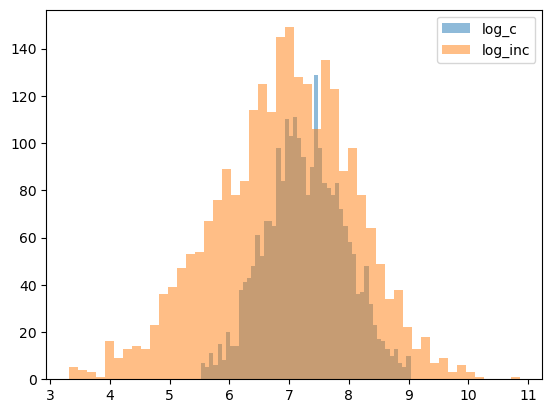

Variance of log of consumption: 0.44025424395877577
Variance of log of income: 1.3304514573213975
Variance of log of wealth: 2.6609688616467295
Rural:
Consumption:  1626.1742139549763
Income:  1725.7252198411843
Wealth:  4497.882280651953

Urban:
Consumption:  2528.5170608627564
Income:  2453.630608717265
Wealth:  6658.045200747606

Rural:
Variance of the log of Consumption:  0.4057463355355449
Variance of the log of Income:  1.3387294173815842
Variance of the log of Wealth:  2.358303864771168

Urban:
Variance of the log of Consumption:  0.4302912423134971
Variance of the log of Income:  1.0906546268319453
Variance of the log of Wealth:  3.9495612224451366

The gini coefficients are 0.3617427358046943 0.5546551299002108 0.6514218990762358
the bottom 50% control 8.0 %
the top 10 % control 50.0 %
the top 5 % control 35.0 %
the top 1 % control 12.0 %


In [55]:
#Part A
df1 = df1[df1['wealth'] != 0]
df1 = df1[df1['consumption'] != 0]
df1 = df1[df1['income'] != 0]
df1['log_c'] = np.log(df1['consumption'].dropna())
df1['log_inc'] = np.log(df1['income'].dropna())
df1['log_w'] = np.log(df1['wealth'].dropna())

plt.hist(df1['log_c'], bins=50, alpha=0.5, label='log_c')
plt.hist(df1['log_inc'], bins=50, alpha=0.5, label='log_inc')
plt.legend()
plt.show()
#Part B
log_c_var=df1['log_c'].var()
log_inc_var=df1['log_inc'].var()
log_w_var=df1['log_w'].var()
print("Variance of log of consumption:", log_c_var)
print("Variance of log of income:", log_inc_var)
print("Variance of log of wealth:", log_w_var)
#Part C
ruraltest = df1[['consumption','income','wealth', 'urban']].dropna().groupby('urban').mean()
for index, row in ruraltest.iterrows():
    if index == 0:
        print("Rural:")
        print("Consumption: ", row['consumption'])
        print("Income: ", row['income'])
        print("Wealth: ", row['wealth'])
        print()
    else:
        print("Urban:")
        print("Consumption: ", row['consumption'])
        print("Income: ", row['income'])
        print("Wealth: ", row['wealth'])
        print()
#Part D
vartest = df1[['log_c','log_inc','log_w', 'urban']].dropna().groupby('urban').var()
for index, row in vartest.iterrows():
    if index == 0:
        print("Rural:")
        print("Variance of the log of Consumption: ", row['log_c'])
        print("Variance of the log of Income: ", row['log_inc'])
        print("Variance of the log of Wealth: ", row['log_w'])
        print()
    else:
        print("Urban:")
        print("Variance of the log of Consumption: ", row['log_c'])
        print("Variance of the log of Income: ", row['log_inc'])
        print("Variance of the log of Wealth: ", row['log_w'])
        print()

#Part E
giniconsumption = gini(df1['consumption'].dropna())
giniwealth = gini(df1['wealth'].dropna())
giniincome = gini(df1['income'].dropna())
print('The gini coefficients are',giniconsumption,giniincome,giniwealth)
#Part F
sorted = df1['wealth'].sort_values(ascending=False)
percentiles = [0.5, 0.9, 0.95, 0.99]

for i in percentiles:
    if i ==(0.5):
        proportion = round((1 - sorted[-int(i*len(sorted)):].sum()/(df1['wealth'].sum())),2)
        print('the bottom 50% control', 100 - proportion*100,'%')
    else:
        proportion = round(sorted[-int(i*len(sorted)):].sum()/(df1['wealth'].sum()),2)
        print('the top', round(100*(1-i)), '% control', 100 - proportion*100,'%')


Part A:This resembles a normal distribution. Inequality is higher in income than consumption.

Part B:In the US, the variance of logs of consumption and income are 0.79 and 0.97 respectively,
so while the variance of income is greater in Uganda, the vairance of logs of consumption is lower

Part C:There is a significant difference in consumption, income, and wealth between rural and urban areas. Wealth is approximately 2150 higher in urban vs rural areas.

Part E:Gini coefficient of consumption is 0.41 in US, compared to .36 for Uganda. Therefore, the US is more unequal than Uganda. Gini coefficient of income is 0.44, compared to 0.55 for Uganda. Therefore, Uganda is more unequal than the US for income. The Gini coefficient is 0.79, compared to 0.65 in uganda. Therefore wealth is more unqual in US.

Part G:According to Unisfef (https://www.unicef.cn/en/figure-27-national-gini-index-20032017#:~:text=Although%20there%20are%20no%20internationally,high%20income%20disparity%2C%20above%200.5), a gini coefficient of 0.36 constitues a 'relatively reasonable' gap. However, a gini coefiicent of above 0.5 is considered evidecne of "severe income disparity". This is problematic as high inequality can stifen economic growth and productivity.

Part H:According to Alvarado and Gasparini, the gini coefficient of consumption in South Africa is 0.63, much higher than our estimate of Uganda of 0.36. Therefore, from our results, they are overestimating inequality.


## Exercise 3

a. Plot the lifecycle of the log of consumption for households where the head is male and for
households where the head is female.

b. Plot the lifecycle of the log of income for households where the head is male and for households where the head is female.

c. Plot the lifecycle of the log of wealth for households where the head is male and for households where the head is female.

d. What are the differences in the lifecycle of households where the head is a male versus the
head is a female?

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

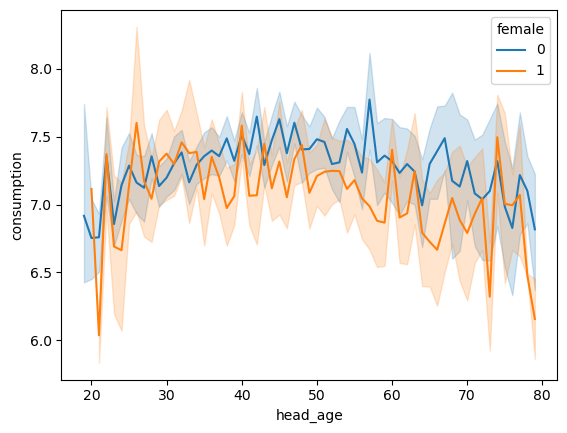

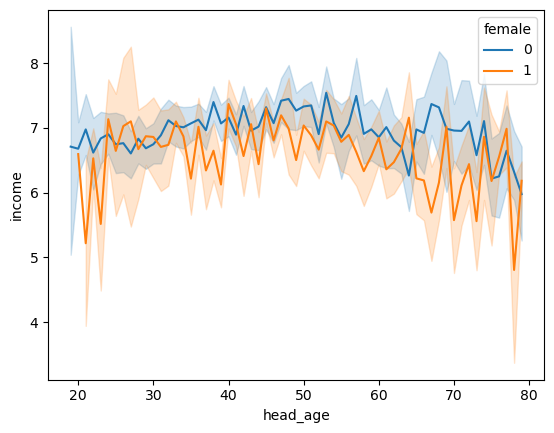

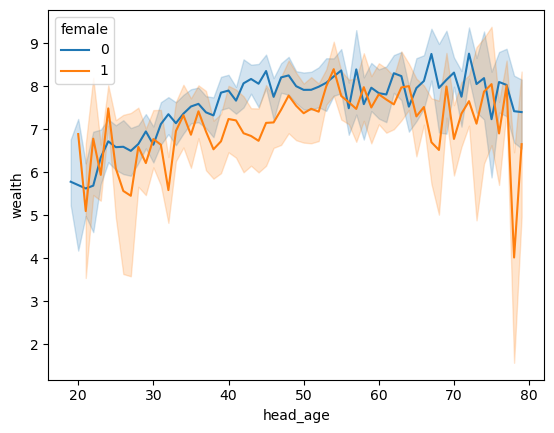

In [48]:
# Drop extreme values (too few observations to get means within age)
df1 = df1[df1['head_age'] < 80]
df1 = df1[df1['head_age'] >18]
#To smooth the lines, group the ages in bins
bins = [18, 30, 40, 50, 60, 80]
labels = [25, 35, 45, 55, 70]
df1['age_bins'] = pd.cut(df1['head_age'],bins=bins, labels=labels)
x = df1['head_age'].sort_values()

#Part A
consumption = sns.lineplot(data = df1, x = x, y = np.log(df1['consumption']), hue = 'female')
plt.figure()
#Part B
wage = sns.lineplot(data = df1, x = x, y = np.log(df1['income']), hue = 'female')
plt.figure()
#Part C
wealth = sns.lineplot(data = df1, x = x, y = np.log(df1['wealth']), hue = 'female')
plt.figure

Part D:They tend to follow similar cycles around the trend over time based on head age. Males tend to always have a higher consumption/income/wealth at each according head age.
